Text(2020-01-23 00:00:00, -100000, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

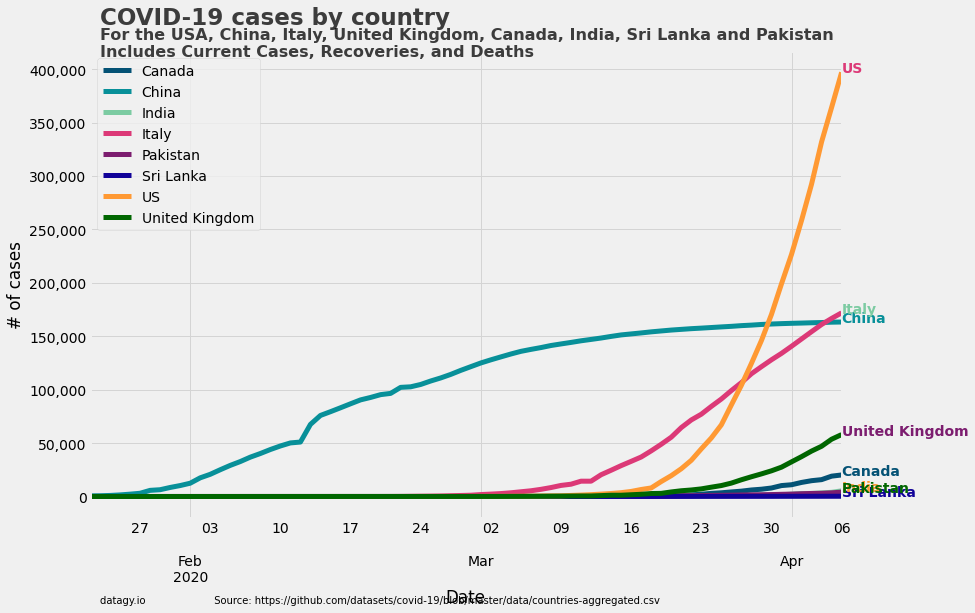

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline

#reading from the given URL which has daily updated data on covid-19
df = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv",parse_dates=['Date'])

countries = ['India', 'US', 'Italy', 'Canada', 'China', 'United Kingdom', 'Pakistan', 'Sri Lanka']
df = df[df['Country'].isin(countries)]

df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

df = df.pivot(index = 'Date', columns = 'Country', values='Cases')
countries=list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace = True)
covid.columns = countries

populations = {'Canada':37664517, 'United Kingdom': 67802690 , 'US': 330548815, 'China':1438027228, 'India':1387297452, 'Sri Lanka':21413249, 'Pakistan':220892340, 'Italy':60481889}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country] * 100000

colors = {'Canada':'#045275', 'China':'#089099', 'Italy':'#7CCBA2', 'US':'#DC3977', 'United Kingdom':'#7C1D6F', 'Sri Lanka':'#110299', 'India': '#FF9933', 'Pakistan':'#006600'}
plt.style.use('fivethirtyeight')

plot = covid.plot(figsize=(12,8), color = list(colors.values()), linewidth=5, legend=True)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color="#d4d4d4")
plot.set_xlabel('Date')
plot.set_ylabel('# of cases')

for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), c = colors[country], s = country, weight = 'bold')
    
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s="COVID-19 cases by country", fontsize=23, weight='bold', alpha=0.75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s="For the USA, China, Italy, United Kingdom, Canada, India, Sri Lanka and Pakistan\nIncludes Current Cases, Recoveries, and Deaths", fontsize=16, weight='bold', alpha=0.75)
plot.text(x = percapita.index[1], y = -100000,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)
